In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from IPython.display import display
import math

In [3]:
df = pd.read_csv('BancoDeDados.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [5]:
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [6]:
def plot_perc(st, dados):
    plt.figure(figsize=(20,8))
    
    g = sns.countplot(x=st, data=dados, orient='h')
    g.set_ylabel('Contagem', fontsize=17)
    sizes = []
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width()/1.6, height+200, '{:1.2f}%'.format(height/116581*100), ha='center', va='bottom',fontsize=12)
    
    g.set_ylim(0,max(sizes)*1.1)

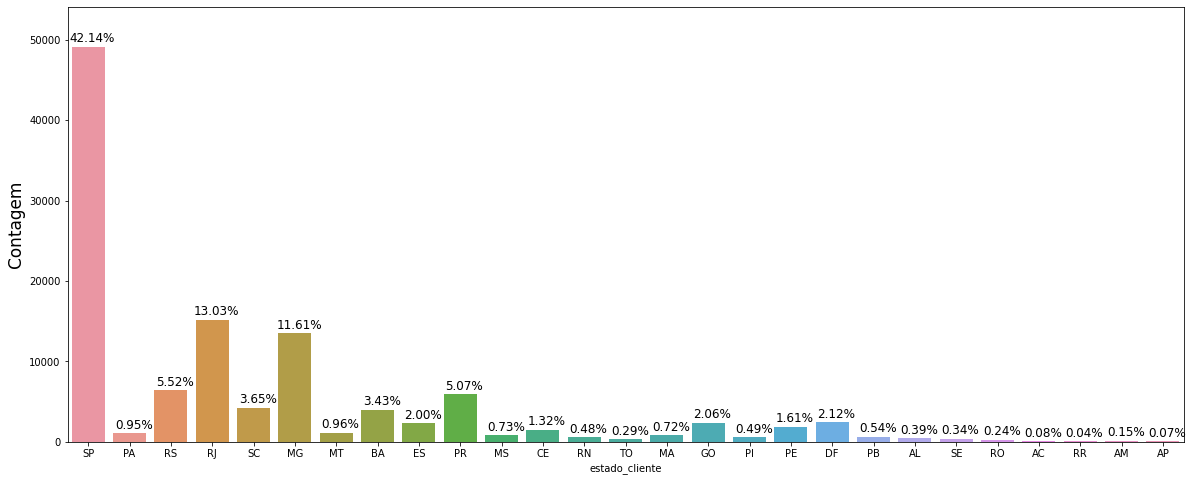

In [7]:
plot_perc('estado_cliente',df)

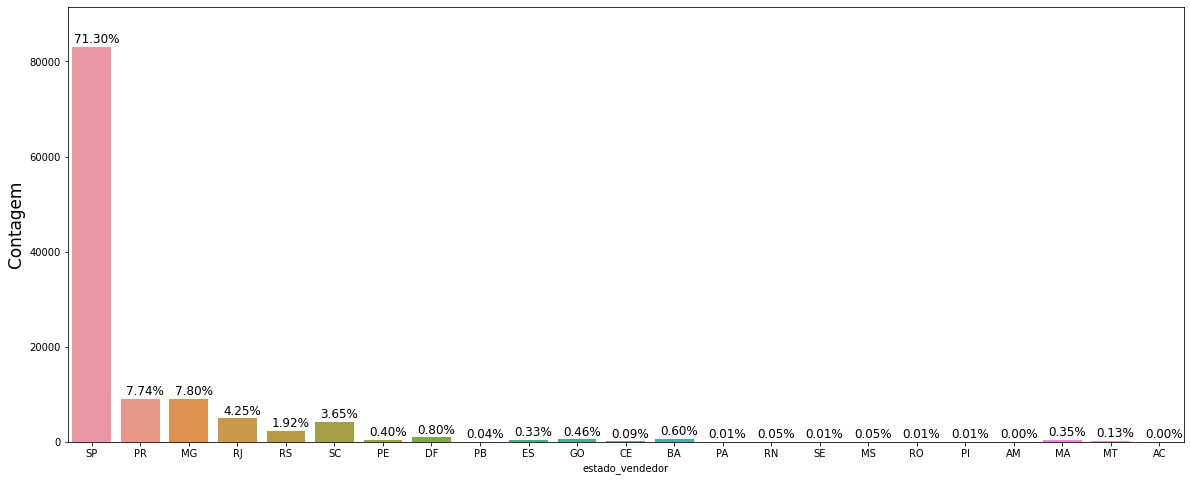

In [8]:
plot_perc('estado_vendedor', df)

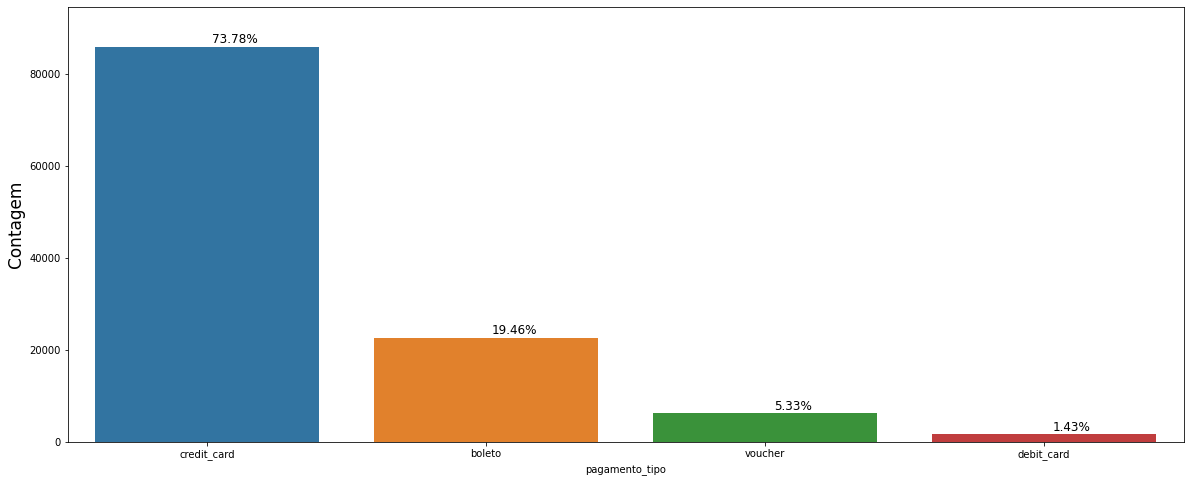

In [9]:
plot_perc('pagamento_tipo', df)

In [10]:
df_olist = df[['id_unico_cliente','id_cliente','horario_pedido','item_id','preco']]
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [11]:
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente','DataMaxCompra']
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])
df_compra.head()

,id_unico_cliente,DataMaxCompra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [12]:
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days

In [13]:
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente','Recencia']], on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [14]:
def calcular_wcss(data):
    wcss = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [15]:
df_recencia = df_usuario[['Recencia']]
df_recencia.head()

,Recencia
0,474
1,298
2,298
3,483
4,211


In [16]:
soma_quadrados = calcular_wcss(df_recencia)

C:\Users\MUF366~1.SIM\AppData\Local\Temp/ipykernel_5584/329791129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters'] = kmeans.labels_
C:\Users\MUF366~1.SIM\AppData\Local\Temp/ipykernel_5584/329791129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters'] = kmeans.labels_
C:\Users\MUF366~1.SIM\AppData\Local\Temp/ipykernel_5584/329791129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

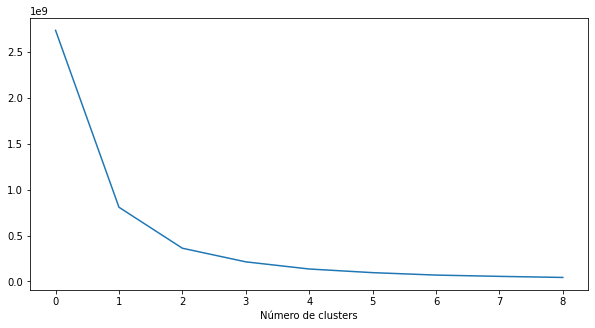

In [17]:
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Número de clusters')
plt.show()

In [18]:
def numero_otimo_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominador = np.sqrt((y2-y1)**2 + (x2-x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2 

In [19]:
n = numero_otimo_clusters(soma_quadrados)
n

4

In [20]:
df_recencia

,Recencia,Clusters
0,474,1
1,298,8
2,298,8
3,483,1
4,211,0
...,...,...
116576,12,6
116577,41,6
116578,41,6
116579,36,6


In [119]:
kmeans = KMeans(n_clusters=4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,3
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,3
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,0


In [120]:
agrupado_por_cluster = df_usuario.groupby('RecenciaCluster')['Recencia'].mean().reset_index()
agrupado_por_cluster.head()

,RecenciaCluster,Recencia
0,0,187.076277
1,1,489.070832
2,2,66.405850
3,3,318.687376


In [121]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='Recencia', ascending=False).reset_index(drop=True)
agrupado_por_cluster_ordenado.head()

,RecenciaCluster,Recencia
0,1,489.070832
1,3,318.687376
2,0,187.076277
3,2,66.405850


In [122]:
agrupado_por_cluster_ordenado['Index'] = agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado

,RecenciaCluster,Recencia,Index
0,1,489.070832,0
1,3,318.687376,1
2,0,187.076277,2
3,2,66.405850,3


In [123]:
juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[['RecenciaCluster','Index']], on='RecenciaCluster')
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,0


In [124]:
removendo_dados = juntando_cluster.drop(columns=['RecenciaCluster'])

In [125]:
df_final = removendo_dados.rename(columns={'Index':'RecenciaCluster'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [131]:
def ordenador_cluster(cluster_nome, target_nome, df):
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome, ascending=True).reset_index(drop=True)
    agrupado_por_cluster_ordenado['Index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df, agrupado_por_cluster_ordenado[[cluster_nome,'Index']], on=cluster_nome)
    removendo_dados = juntando_cluster.drop(columns=[cluster_nome])
    df_final = removendo_dados.rename(columns={'Index':cluster_nome})
    return df_final

In [128]:
df_usuario = ordenador_cluster('RecenciaCluster','Recencia', df_usuario)

In [129]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [132]:
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,20697.0,489.070832,59.862148,404.0,441.0,480.0,532.0,728.0
1,30695.0,318.687376,43.450070,253.0,281.0,312.0,355.0,403.0
2,33601.0,187.076277,35.024122,127.0,157.0,187.0,217.0,252.0
3,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0


In [133]:
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente','Frequencia']
df_frequencia.head()

,id_unico_cliente,Frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [134]:
df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [135]:
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


In [136]:
df_usuario = ordenador_cluster('FrequenciaCluster','Frequencia', df_usuario)

In [137]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
2,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [138]:
df_receita = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()
df_receita.columns = ['id_unico_cliente','Receita']
df_usuario = pd.merge(df_usuario, df_receita, on='id_unico_cliente')
df_receita = df_usuario[['Receita']]
kmeans = KMeans(n_clusters=4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_receita)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


In [139]:
df_usuario = ordenador_cluster('ReceitaCluster','Receita', df_usuario)

In [140]:
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [141]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


In [144]:
df_final = df_usuario[['id_unico_cliente','Recencia', 'RecenciaCluster', 'Frequencia', 'FrequenciaCluster','Receita', 'ReceitaCluster']]
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3


In [145]:
df_final['Pontuacao'] = df_usuario['RecenciaCluster']+df_usuario['FrequenciaCluster']+df_usuario['ReceitaCluster']
df_final.head()

C:\Users\MUF366~1.SIM\AppData\Local\Temp/ipykernel_34532/380856949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Pontuacao'] = df_usuario['RecenciaCluster']+df_usuario['FrequenciaCluster']+df_usuario['ReceitaCluster']


,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0


In [146]:
df_final.Pontuacao.max()

7

In [147]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao'] >= 1, 'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao'] >= 3, 'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao'] >= 5, 'Segmento'] = 'Premium'



C:\Users\MUF366~1.SIM\AppData\Local\Temp/ipykernel_34532/1020469365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Segmento'] = 'Inativo'
C:\Users\mu.simao\Documents\Python\projeto2\venv\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\mu.simao\Documents\Python\projeto2\venv\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [148]:
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium


In [149]:
df_final.to_csv('RFM.csv', index=False)

In [155]:
def plot_segmento(x,y,dados):
    sns.set(palette='muted',color_codes=True,style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,y=y,hue='Segmento',data=dados,sizes = (50,150), size_order=['Premium','Master','Business'])
    plt.show()

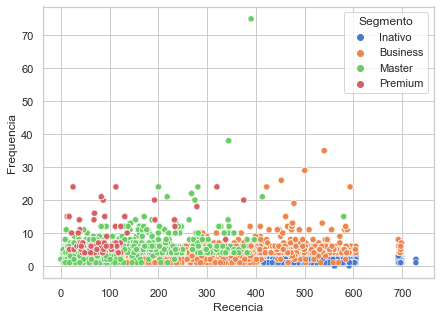

In [156]:
plot_segmento('Recencia','Frequencia',df_final)

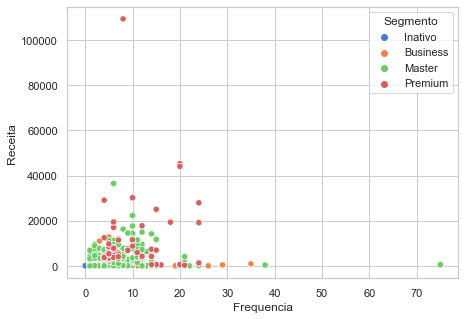

In [157]:
plot_segmento('Frequencia','Receita',df_final)

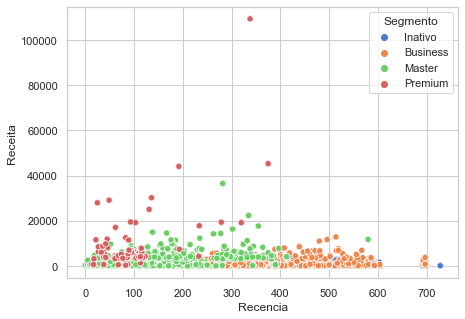

In [159]:
plot_segmento('Recencia','Receita',df_final)

C:\Users\mu.simao\Documents\Python\projeto2\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmento', ylabel='count'>

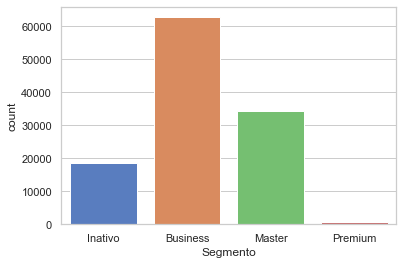

In [160]:
sns.countplot(df_final['Segmento'])